https://segment-anything.com/

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# Run the installation commands
!pip install opendatasets
!pip install ultralytics

# Clean up the notebook
clean_notebook()



Notebook cleaned.


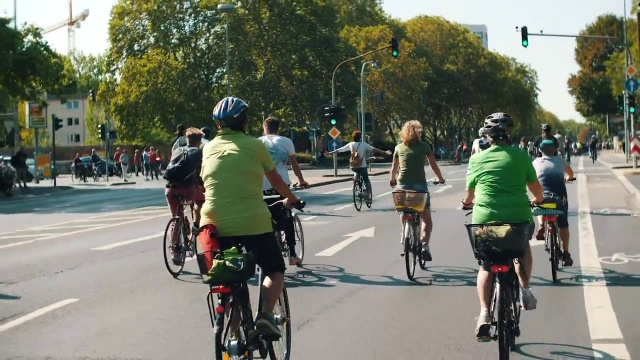

In [ ]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Open the video file
cap = cv2.VideoCapture('.././/Videos/video5.mp4')

if not cap.isOpened():
    print("Cannot open video file")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Stream stopped.")
        break
    
    frame = cv2.resize(frame, (frame.shape[1] // 2, frame.shape[0]//2))

    # Convert the frame to JPEG format for display in Jupyter
    _, buffer = cv2.imencode('.jpg', frame)
    img_bytes = buffer.tobytes()

    # Display the frame in Jupyter Notebook
    display(Image(data=img_bytes))
    clear_output(wait=True)  # Clear previous frame for smoother playback

  
    
cap.release()
print("Video stream ended.")

# First Frame with point

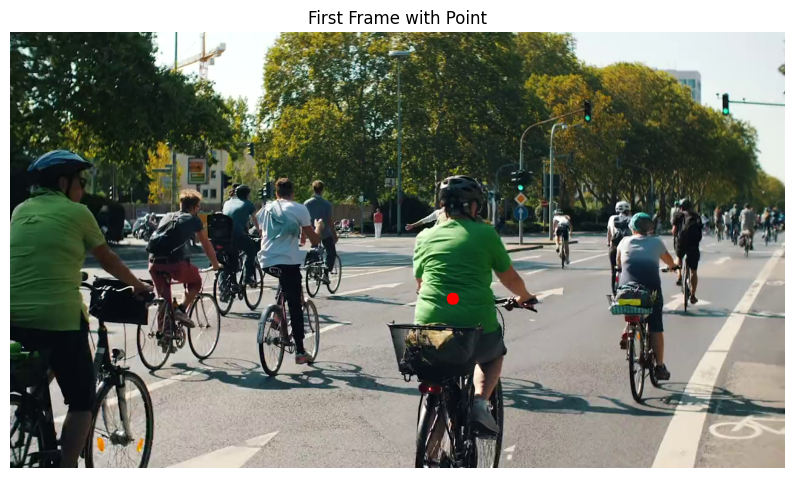

In [2]:
import cv2
import matplotlib.pyplot as plt

# Define the point to draw
points = [[731, 440]]

# Open the video file
cap = cv2.VideoCapture('.././/Videos/video5.mp4')

if not cap.isOpened():
    print("Error: Cannot open video file.")
    exit()

# Set the frame position to the 1st frame (frame index 0)
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Read the frame
ret, frame = cap.read()

if not ret:
    print("Error: Cannot read the video frame.")
    cap.release()
    exit()

# Convert the frame to RGB (since OpenCV uses BGR by default)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Draw the points on the frame
for point in points:
    cv2.circle(frame_rgb, (point[0], point[1]), radius=10, color=(255, 0, 0), thickness=-1)  # Blue dot

# Release the video capture object
cap.release()

# Plot the image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.title("First Frame with Point")
plt.axis("off")  # Turn off axes
plt.show()



# Tracking

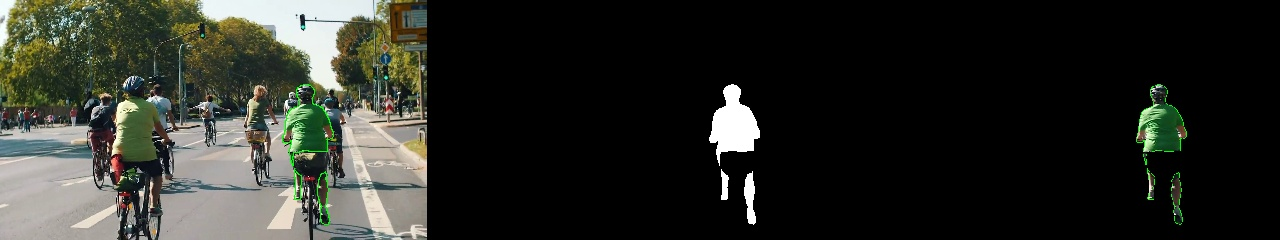

In [ ]:
from ultralytics.models.sam import SAM2VideoPredictor
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Create SAM2VideoPredictor with desired overrides
overrides = dict(conf=0.25, task="segment", mode="predict", imgsz=1024, model="sam2_b.pt")
predictor = SAM2VideoPredictor(overrides=overrides)

# Path to the video file
video_path = '.././Videos/video5.mp4'

# Run inference with stream=True
results = predictor(source=video_path, points=[[731, 440]], labels=[1], stream=True)

# Process each frame's results
for r in results:
    frame = r.orig_img  # Original frame
    
    if r.masks is not None:
        # Initialize mask image
        mask_img = np.zeros_like(frame, dtype=np.uint8)
       

        # Draw masks on the mask image
        for mask in r.masks.data:
            mask = mask.cpu().numpy().astype(np.uint8) * 255
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(frame, contours, -1, (0, 255, 0), 2)
            cv2.drawContours(mask_img, contours, -1, (255, 255, 255), -1)  # White filled masks


        # Perform bitwise AND between the frame and the mask image
        bitwise_and_img = cv2.bitwise_and(frame, mask_img)
 
        # Resize the combined image to 50% of its width
        combined_img = np.hstack((frame,mask_img, bitwise_and_img))
        combined_img = cv2.resize(combined_img, (combined_img.shape[1] // 3, combined_img.shape[0]//3))

    

        # Convert the combined image to JPEG format for display in Jupyter
        _, buffer = cv2.imencode('.jpg', combined_img)
        img_bytes = buffer.tobytes()

        # Display the combined image in Jupyter Notebook
        clear_output(wait=True)  # Clear previous frame for smoother playback
        display(Image(data=img_bytes))

print("Video stream ended.")
